In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\DVK\\Desktop\\EMIPredict AI\\data\\emi_prediction_dataset.csv')
df.head()

C:\Users\DVK\AppData\Local\Temp\ipykernel_15752\829571870.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\DVK\\Desktop\\EMIPredict AI\\data\\emi_prediction_dataset.csv')


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15.0,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19.0,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16.0,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83.0,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7.0,Not_Eligible,500.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187767 entries, 0 to 187766
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     187767 non-null  object 
 1   gender                  187767 non-null  object 
 2   marital_status          187767 non-null  object 
 3   education               186645 non-null  object 
 4   monthly_salary          187767 non-null  object 
 5   employment_type         187767 non-null  object 
 6   years_of_employment     187766 non-null  float64
 7   company_type            187766 non-null  object 
 8   house_type              187766 non-null  object 
 9   monthly_rent            186672 non-null  float64
 10  family_size             187766 non-null  float64
 11  dependents              187766 non-null  float64
 12  school_fees             187766 non-null  float64
 13  college_fees            187766 non-null  float64
 14  travel_expenses     

In [3]:
df.isna().sum()

age                          0
gender                       0
marital_status               0
education                 1122
monthly_salary               0
employment_type              0
years_of_employment          1
company_type                 1
house_type                   1
monthly_rent              1095
family_size                  1
dependents                   1
school_fees                  1
college_fees                 1
travel_expenses              1
groceries_utilities          1
other_monthly_expenses       1
existing_loans               1
current_emi_amount           1
credit_score              1150
bank_balance              1129
emergency_fund            1082
emi_scenario                 1
requested_amount             1
requested_tenure             1
emi_eligibility              1
max_monthly_emi              1
dtype: int64

In [4]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [5]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [6]:
df.isnull().sum()


age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64

In [7]:
df['age'].unique()

array([38.0, 58.0, 48.0, 32.0, 27.0, 47.0, 37.0, 31.0, 59.0, 49.0, 33.0,
       26.0, 39.0, 57.0, 28.0, '58', '38', '48', '32', '27', '37', '48.0',
       '33', '38.0', '49', '27.0', '31', '39', '47', '59', '32.0', '58.0',
       '57', '26', '28', '58.0.0', '39.0', '26.0', '37.0'], dtype=object)

In [8]:
df['age'] = df['age'].astype(str)


In [9]:
df['age'] = df['age'].str.replace(r'[^0-9.]', '', regex=True)


In [10]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')


In [11]:
df['age'] = df['age'].fillna(df['age'].median())


In [12]:
df['age'] = df['age'].astype(int)


In [13]:
df['age'].unique()

array([38, 58, 48, 32, 27, 47, 37, 31, 59, 49, 33, 26, 39, 57, 28])

In [14]:
df['gender'].unique()

array(['Female', 'Male', 'female', 'male', 'M', 'MALE', 'F', 'FEMALE'],
      dtype=object)

In [15]:
df['gender'] = df['gender'].astype(str).str.lower().str.strip()
gender_map = {
    'male': 'Male',
    'm': 'Male',
    'female': 'Female',
    'f': 'Female'
}

df['gender'] = df['gender'].map(gender_map)
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])


In [16]:
df['gender'].unique()


array(['Female', 'Male'], dtype=object)

In [17]:
df['monthly_salary'].unique()

array(['82600.0', '21500.0', '86100.0', ..., '65645.0', '414554.0',
       '8233.0'], shape=(7629,), dtype=object)

In [18]:
df['monthly_salary'] = df['monthly_salary'].astype(str)
df['monthly_salary'] = df['monthly_salary'].str.replace(',', '', regex=False)
df['monthly_salary'] = pd.to_numeric(df['monthly_salary'], errors='coerce')
df['monthly_salary'] = df['monthly_salary'].fillna(df['monthly_salary'].median())


In [19]:
df['monthly_salary'].sample(10)

178117     63200.0
18199     107400.0
147969     68500.0
71048      45200.0
19734      62700.0
59427      28500.0
56569      15000.0
32054     100500.0
64602       7477.0
8229       33600.0
Name: monthly_salary, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187767 entries, 0 to 187766
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     187767 non-null  int64  
 1   gender                  187767 non-null  object 
 2   marital_status          187767 non-null  object 
 3   education               187767 non-null  object 
 4   monthly_salary          187767 non-null  float64
 5   employment_type         187767 non-null  object 
 6   years_of_employment     187767 non-null  float64
 7   company_type            187767 non-null  object 
 8   house_type              187767 non-null  object 
 9   monthly_rent            187767 non-null  float64
 10  family_size             187767 non-null  float64
 11  dependents              187767 non-null  float64
 12  school_fees             187767 non-null  float64
 13  college_fees            187767 non-null  float64
 14  travel_expenses     

In [21]:
df['bank_balance'].unique()

array(['303200.0', '92500.0', '672100.0', ..., '192300.0.0', '889200.0',
       '910500.0'], shape=(10400,), dtype=object)

In [22]:
df['bank_balance'] = df['bank_balance'].astype(str)
df['bank_balance'] = df['bank_balance'].str.replace(r'[^0-9.]', '', regex=True)
df['bank_balance'] = pd.to_numeric(df['bank_balance'], errors='coerce')
df['bank_balance'] = df['bank_balance'].fillna(df['bank_balance'].median())


In [23]:
df['bank_balance'].unique()

array([ 303200.,   92500.,  672100., ..., 1133300.,  889200.,  910500.],
      shape=(9564,))

In [24]:
df['existing_loans'].value_counts()   

existing_loans
No     112629
Yes     75138
Name: count, dtype: int64

In [25]:
df.duplicated().sum()
#df = df.drop_duplicates()

np.int64(0)

In [26]:
df['age'] = df['age'].astype(int)
df['family_size'] = df['family_size'].astype(int)


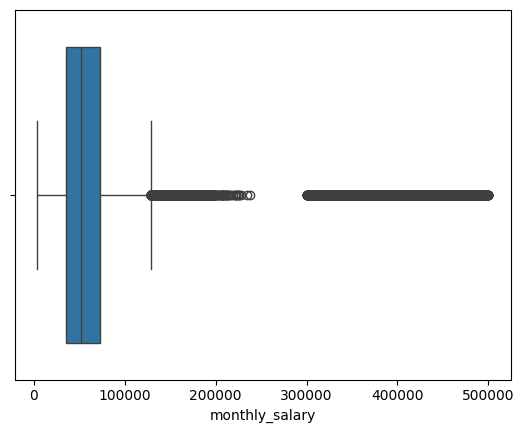

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['monthly_salary'])
plt.show()


In [28]:
df['emi_eligibility'].value_counts()


emi_eligibility
Not_Eligible    145028
Eligible         34525
High_Risk         8214
Name: count, dtype: int64

In [29]:
df['max_monthly_emi'].describe()


count    187767.000000
mean       6774.770626
std        7751.039327
min         500.000000
25%         500.000000
50%        4224.000000
75%        9800.000000
max       91040.400000
Name: max_monthly_emi, dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187767 entries, 0 to 187766
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     187767 non-null  int64  
 1   gender                  187767 non-null  object 
 2   marital_status          187767 non-null  object 
 3   education               187767 non-null  object 
 4   monthly_salary          187767 non-null  float64
 5   employment_type         187767 non-null  object 
 6   years_of_employment     187767 non-null  float64
 7   company_type            187767 non-null  object 
 8   house_type              187767 non-null  object 
 9   monthly_rent            187767 non-null  float64
 10  family_size             187767 non-null  int64  
 11  dependents              187767 non-null  float64
 12  school_fees             187767 non-null  float64
 13  college_fees            187767 non-null  float64
 14  travel_expenses     

In [31]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15.0,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19.0,Not_Eligible,700.0
2,38,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16.0,Eligible,27775.0
3,58,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83.0,Eligible,16170.0
4,48,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7.0,Not_Eligible,500.0


In [32]:
df.to_csv('C:\\Users\\DVK\\Desktop\\EMIPredict AI\\data\\emi_prediction_dataset_cleaned.csv', index=False)